In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dmt.simulate import generate_frb
from dmt.libdmt import FDMT

In [2]:
nchans = 336; f_max = 1440.0; foff = 1.0; tsamp = 1e-3; nsamps = 512
f_min = f_max - nchans*foff

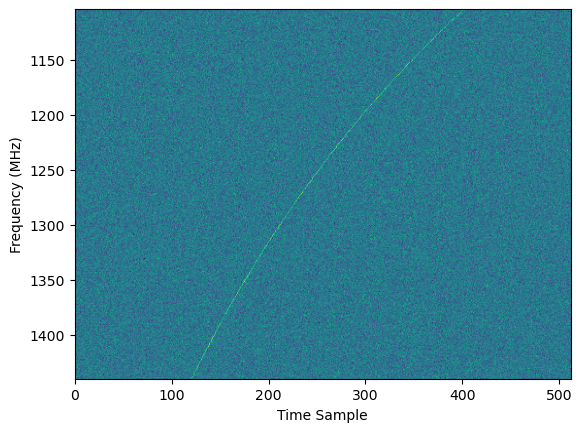

In [3]:
frb = generate_frb(f_min, f_max, nchans, nsamps, tsamp, dm=200, offset=400, amp=20, noise_rms=5, width=1)
plt.imshow(frb, aspect='auto', extent=[0, nsamps, f_max, f_min])
plt.xlabel('Time Sample')
plt.ylabel('Frequency (MHz)')
plt.savefig("waterfall.png", bbox_inches='tight', dpi=100)

In [4]:
thefdmt = FDMT(f_min, f_max, nchans, nsamps, tsamp, dt_max=512, dt_min=0, dt_step=1)
thefdmt.set_log_level(1)
thefdmt.set_num_threads(8)
dmt_transform = thefdmt.execute(frb.astype(np.float32))

[2024-05-06 02:59:01.303] [debug] FDMT: Input dimensions: 336x512
[2024-05-06 02:59:01.303] [debug] FDMT: Iteration 0, dimensions: 832 (336x[2..3]) x 512
[2024-05-06 02:59:01.303] [debug] FDMT: Iteration 1, dimensions: 671 (168x[3..5]) x 512
[2024-05-06 02:59:01.304] [debug] FDMT: Iteration 2, dimensions: 595 (84x[5..10]) x 512
[2024-05-06 02:59:01.304] [debug] FDMT: Iteration 3, dimensions: 553 (42x[9..19]) x 512
[2024-05-06 02:59:01.304] [debug] FDMT: Iteration 4, dimensions: 532 (21x[17..36]) x 512
[2024-05-06 02:59:01.304] [debug] FDMT: Iteration 5, dimensions: 522 (11x[17..70]) x 512
[2024-05-06 02:59:01.304] [debug] FDMT: Iteration 6, dimensions: 517 (6x[17..133]) x 512
[2024-05-06 02:59:01.304] [debug] FDMT: Iteration 7, dimensions: 515 (3x[89..246]) x 512
[2024-05-06 02:59:01.304] [debug] FDMT: Iteration 8, dimensions: 514 (2x[89..425]) x 512
[2024-05-06 02:59:01.304] [debug] FDMT: Iteration 9, dimensions: 513 (1x[513..513]) x 512


Maximum at t = 400, DM trial = 280, DM = 199.54525756835938pc/cm^3


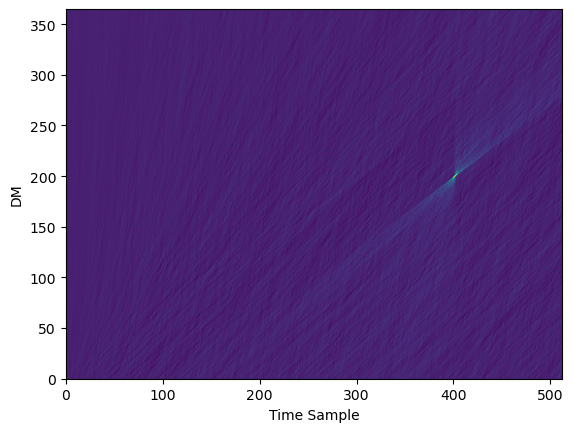

In [5]:
plt.imshow(dmt_transform, origin='lower', aspect='auto',
           extent=[0, nsamps, thefdmt.dm_grid_final.min(), thefdmt.dm_grid_final.max()])
idm_max, t_max = np.unravel_index(dmt_transform.argmax(), dmt_transform.shape)
print(f"Maximum at t = {t_max}, DM trial = {idm_max}, DM = {thefdmt.dm_grid_final[idm_max]}pc/cm^3")
plt.xlabel('Time Sample')
plt.ylabel('DM')
plt.savefig("dmt.png", bbox_inches='tight', dpi=100)